In [ ]:
%pip install -U scikit-learn

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer,LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [45]:
data = pd.read_excel("Copper_Set.xlsx")

In [46]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [51]:
data["quantity tons"].replace("e",np.nan,inplace=True)

In [52]:
data['quantity tons'].fillna(data['quantity tons'].median(),inplace=True)

In [55]:
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [54]:
data.drop(columns=["id","item_date","material_ref","delivery date"],axis=1,inplace=True)
data["customer"] = data["customer"].fillna(data["customer"].median())
data["country"] = data["country"].fillna(data["country"].median())
data["status"] = data["status"].fillna("Won")
data["application"] = data["application"].fillna(data["application"].median())
data["thickness"] = data["thickness"].fillna(data["thickness"].median())
data["selling_price"] = data["selling_price"].fillna(data["selling_price"].median())

In [15]:
# ['quantity tons',"customer","country","application","thickness","width","product_ref","selling_price"]

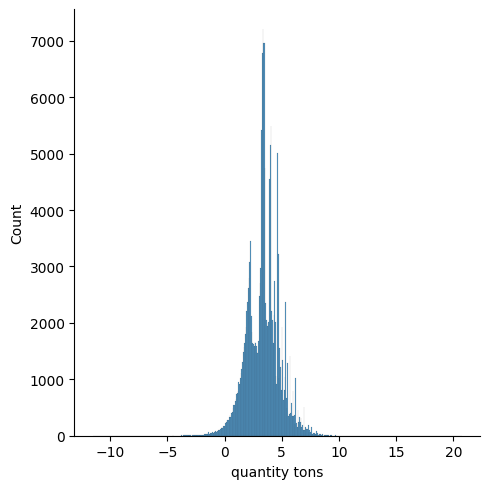

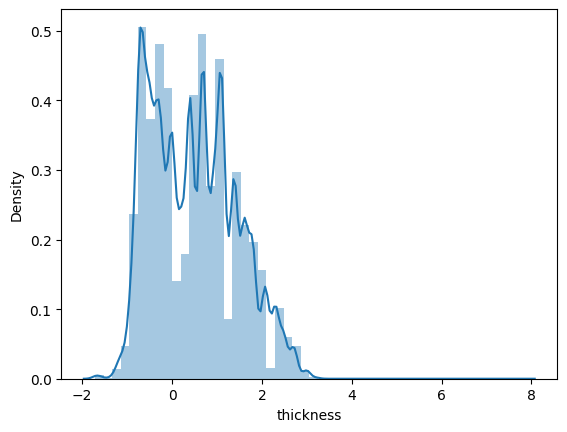

In [56]:
data['quantity tons'] = np.log(data['quantity tons'])
sns.displot(data["quantity tons"])
plt.show()
data['thickness'] = np.log(data['thickness'])
sns.distplot(data['thickness'])
plt.show()

In [57]:
print(data['status'].value_counts())
print(data['item type'].value_counts())

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64


In [13]:
data['status'].replace("Not lost for AM","Won",inplace=True)
data['status'].replace("Revised","Lost",inplace=True)
data['status'].replace("To be approved","Lost",inplace=True)
data['status'].replace("Draft","Lost",inplace=True)
data['status'].replace("Offered","Lost",inplace=True)
data['status'].replace("Offerable","Lost",inplace=True)
data['status'].replace("Wonderful","Lost",inplace=True)

<Axes: >

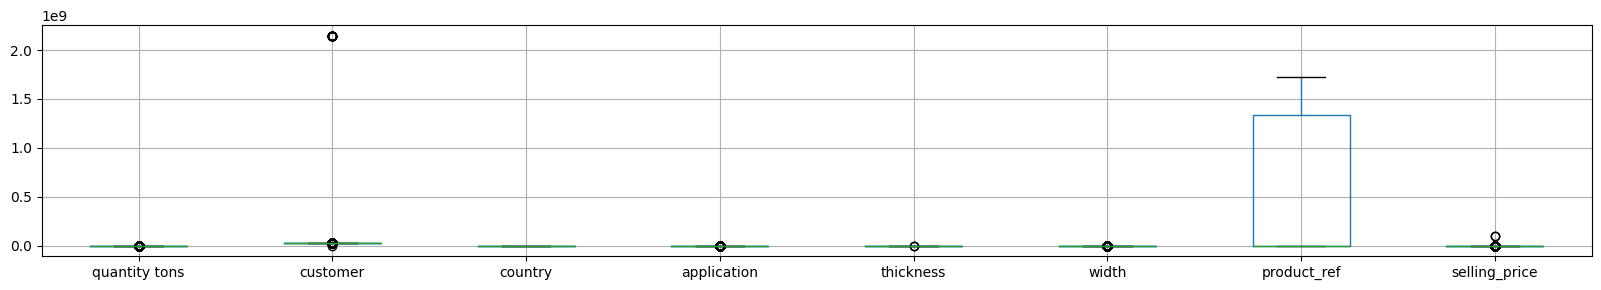

In [58]:
data.boxplot(figsize=(20,3))

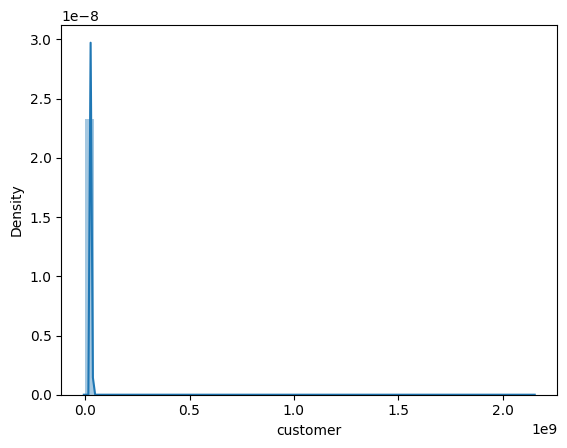

In [59]:

sns.distplot(data['customer'])
plt.show()

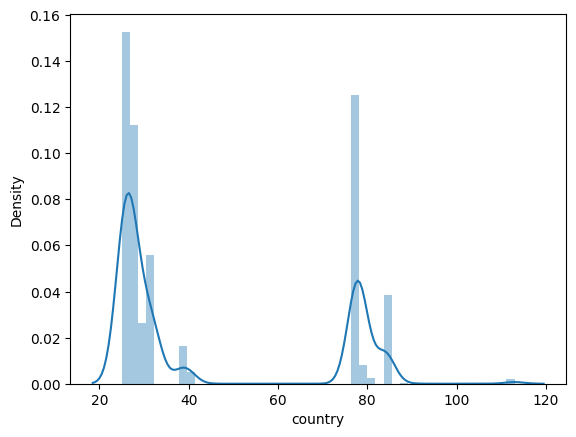

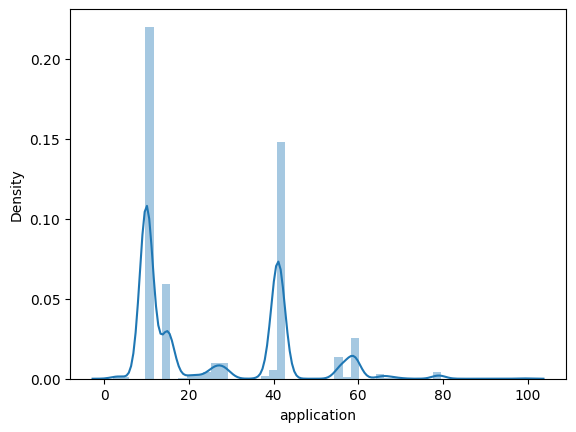

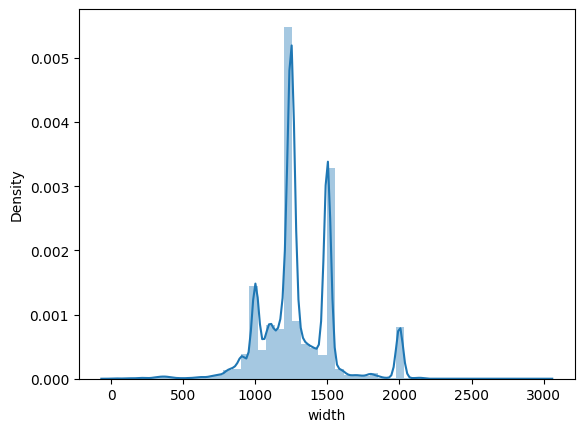

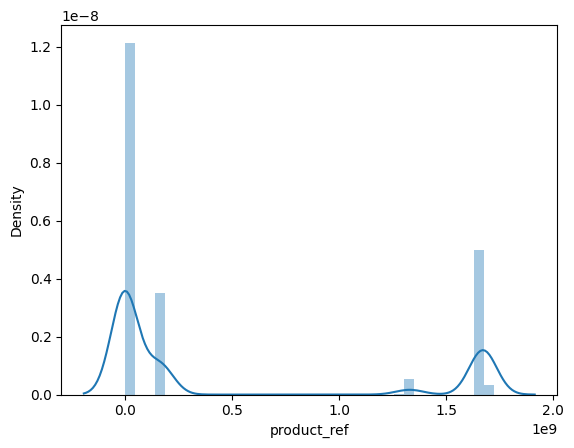

In [60]:
sns.distplot(data['country'])
plt.show()
sns.distplot(data['application'])
plt.show()
sns.distplot(data['width'])
plt.show()
sns.distplot(data['product_ref'])
plt.show()

In [65]:
num = []
for i in data.columns:
    if data[i].dtype == 'object':
        continue
    num.append(i)

In [81]:
num[0:-1]

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'product_ref']

In [61]:
data[['quantity tons',"customer","country","application","thickness","width","product_ref","selling_price"]].corr()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
quantity tons,1.000000,0.002611,-0.088928,0.063961,0.042063,0.034441,0.064062,-0.000991
customer,0.002611,1.000000,-0.006669,-0.006869,0.018855,0.009203,-0.007716,-0.000053
country,-0.088928,-0.006669,1.000000,-0.019304,-0.065344,0.055229,-0.147326,0.002993
application,0.063961,-0.006869,-0.019304,1.000000,-0.197553,-0.204478,-0.131784,0.001462
thickness,0.042063,0.018855,-0.065344,-0.197553,1.000000,0.387251,0.234211,-0.004516
width,0.034441,0.009203,0.055229,-0.204478,0.387251,1.000000,-0.034460,0.000583
product_ref,0.064062,-0.007716,-0.147326,-0.131784,0.234211,-0.034460,1.000000,0.002118
selling_price,-0.000991,-0.000053,0.002993,0.001462,-0.004516,0.000583,0.002118,1.000000


In [100]:
col = []
for i in data.columns[0:-1]:
    col.append(i)
col

['quantity tons',
 'customer',
 'country',
 'status',
 'item type',
 'application',
 'thickness',
 'width',
 'product_ref']

In [101]:
x = data[col]
y = data[[num[-1]]]

In [107]:
x.rename(columns={"item type":"item_type"},inplace=True)

In [111]:
x.head()

,quantity tons,customer,country,status,item_type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,7,5,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,7,5,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,7,6,28.0,-0.967584,952.0,628377
3,5.310301,30349574.0,32.0,7,3,59.0,0.832909,1317.0,1668701718
4,6.666354,30211560.0,28.0,7,5,10.0,1.386294,2000.0,640665


In [109]:
label = LabelEncoder()

In [110]:
x['status'] = label.fit_transform(x.status)
x['item_type'] = label.fit_transform(x.item_type)

In [70]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [71]:
ohe.fit(data[['status']])

OneHotEncoder(handle_unknown='ignore')

In [72]:
status = ohe.fit_transform(data[['status']]).toarray()

In [74]:
ohe2 = ohe
ohe2.fit(data[['item type']])
item_type = ohe.fit_transform(data[['item type']]).toarray()

In [112]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [115]:
x[0]

array([ 0.4150354 , -0.01462579, -0.69215874,  0.70634112,  0.82159022,
       -0.87951774,  0.2278673 ,  0.78245028,  1.66803815])

In [88]:
x = np.concatenate((x[['quantity tons','customer','country','application','thickness','width','product_ref']].values,status,item_type),axis=1)

In [116]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [117]:
xtest.shape

(54502, 9)

In [118]:
lm = LinearRegression()

In [ ]:
model = lm.fit(xtrain,ytrain)

In [120]:
z = pd.DataFrame(x,columns=['quantity tons','customer','country','status','item_type','application','thickness','width','product_ref'])
z

,quantity tons,customer,country,status,item_type,application,thickness,width,product_ref
0,0.415035,-0.014626,-0.692159,0.706341,0.821590,-0.879518,0.227867,0.782450,1.668038
1,2.250536,-0.012710,-0.815095,0.706341,0.821590,0.866629,-0.753416,-0.325981,1.665115
2,1.774606,-0.014722,-0.610201,0.706341,1.769254,0.134374,-1.550660,-1.312102,-0.659699
3,1.327595,-0.006683,-0.528244,0.706341,-1.073736,1.880521,0.377543,0.082992,1.665115
4,2.266130,-0.012355,-0.692159,0.706341,0.821590,-0.879518,0.970180,2.693539,-0.659682
...,...,...,...,...,...,...,...,...,...
181668,0.856540,-0.012795,-0.815095,0.706341,0.821590,0.866629,-0.558162,-0.287759,-0.431809
181669,1.346734,-0.012795,-0.815095,0.706341,0.821590,0.866629,-0.569377,0.782450,-0.431809
181670,-1.348633,-0.012795,-0.815095,0.706341,0.821590,0.866629,-0.881228,-0.173094,-0.431809
181671,NaN,-0.012795,-0.815095,0.706341,0.821590,0.866629,-0.688491,-0.173094,-0.431809


In [121]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181669 non-null  float64
 1   customer       181673 non-null  float64
 2   country        181673 non-null  float64
 3   status         181673 non-null  float64
 4   item_type      181673 non-null  float64
 5   application    181673 non-null  float64
 6   thickness      181673 non-null  float64
 7   width          181673 non-null  float64
 8   product_ref    181673 non-null  float64
dtypes: float64(9)
memory usage: 12.5 MB


In [149]:
z.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
dtype: int64

In [148]:
z['quantity tons'].fillna(z['quantity tons'].median(),inplace=True)

In [125]:
z.shape

(181673, 9)

In [126]:
y.shape

(181673, 1)

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(z,y,test_size=0.3,random_state=1)

In [128]:
lm = LinearRegression()

In [129]:
model = lm.fit(xtrain,ytrain)

In [130]:
pred = model.predict(xtest)

In [132]:
pred

array([[-2950.21247432],
       [12725.23496234],
       [ 8595.306951  ],
       ...,
       [-1181.29270403],
       [ 3643.59959724],
       [-4004.16690851]])

In [131]:
r2 = r2_score(ytest,pred)
r2

-445.68877636344905

<Axes: >

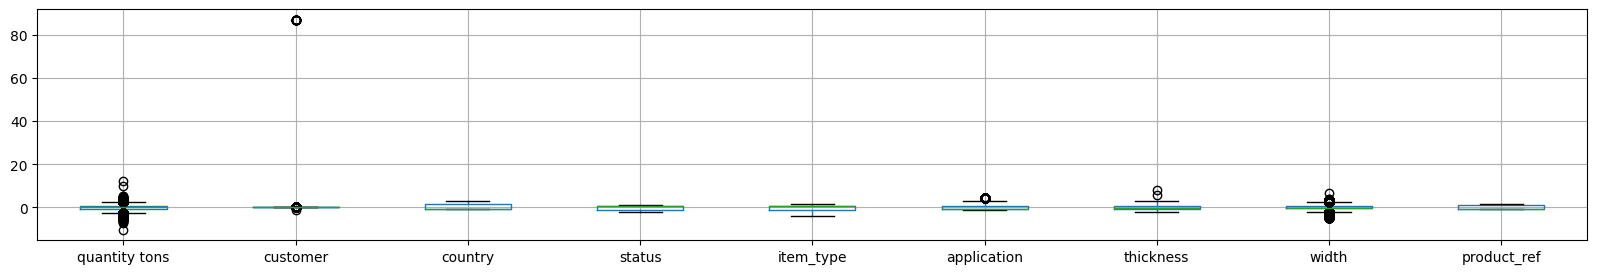

In [133]:
z.boxplot(figsize=(20,3))

In [134]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [135]:
cols = ['quantity tons',"customer","application","thickness","width"]

In [141]:
for column in cols:
    lr,ur=remove_outlier(z[column])
    z[column]=np.where(z[column]>ur,ur,z[column])
    z[column]=np.where(z[column]<lr,lr,z[column])

<Axes: >

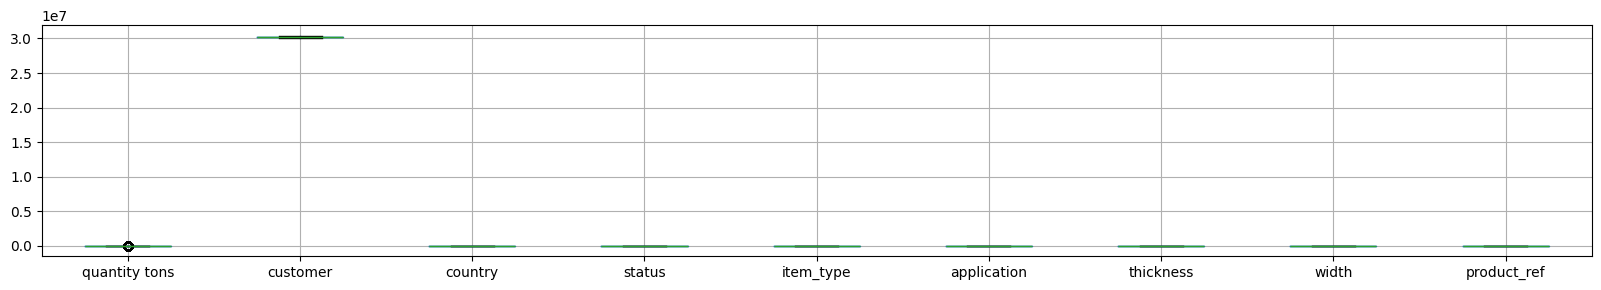

In [150]:
z.boxplot(figsize=(20,3))

In [143]:
z['customer'].max()

30405714.0

In [151]:
xtrain,xtest,ytrain,ytest = train_test_split(z,y,test_size=0.3,random_state=1)

In [152]:
linear = LinearRegression()

In [153]:
models = linear.fit(xtrain,ytrain)

In [154]:
prediction = models.predict(xtest)

In [155]:
r2score = r2_score(ytest,prediction)
r2score

-468.20073170037335